***
# Starting Kit - Black Swan HiggsML Course
***

In [1]:

# HiggsML utility package should not be modified
# %pip install HiggsML 
    

### Imports

In [2]:
from sys import path
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
from itertools import product
from numpy.random import RandomState
import warnings
import os
import sys
warnings.filterwarnings("ignore")

### Directories

In [3]:

root_dir = os.getcwd()
print("Root directory is", root_dir)
submission_dir = os.path.join(root_dir, "sample_code_submission")

# The directory where results and other outputs from the participant's code will be written
output_dir = os.path.join(root_dir, "sample_result_submission")

if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    

Root directory is /home/chakkappai/Work/ST4_CS/Collaboration_A


## Import Submission Model
We import a class named `Model` from the submission file (`model.py`). This `Model` class has the following methods:
- `init`: receives train set and systematics class as input
- `fit`: can be used for training
- `predict`: receives one test set and outputs a dictionary with the following keys
    - `mu_hat` : predicted mu $\hat{\mu}$
    - `delta_mu_hat`: $\Delta{\hat{\mu}}$ bound for $\mu$
    - `p16`: 16th percentile
    - `p84`: 84th percentile

In this example code, the `Model` class implements a basic model with 2 different model trained to predict the class label. 

* 1 XGBoost BDT ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/boosted_decision_tree.py) )
* 2 Tebsorflow NN  ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/neural_network.py) )

The feature engineering is in where you can include derived quantities and decide which feature should be needed. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/feature_engineering.py) ) 

the statistical analysis part is where yoiu write the mu finding calculation using the output of the classifier. ( [see](/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_code_submission/statistical_analysis.py) ) 

If running in Collab, click the folder icon in the left sidebar to open the file browser.


In [4]:
path.append(submission_dir)
from model import Model

## Data

In [5]:
from HiggsML.datasets import download_dataset
data = download_dataset("sample_data") # change to "blackswan_data" for the actual data

2025-05-16 12:39:11,095 - HiggsML.datasets     - INFO     - Handling as dataset name: sample_data
2025-05-16 12:39:11,096 - HiggsML.datasets     - INFO     - Current working directory: /home/chakkappai/Work/ST4_CS/Collaboration_A
2025-05-16 12:39:11,097 - HiggsML.datasets     - INFO     - Total rows: 1000
2025-05-16 12:39:11,097 - HiggsML.datasets     - INFO     - Test size: 300


### ⚠️ Note:
The data used here is a small subset of the full data is for demonstration only to get a view of what the data looks like. 

In [6]:
# load train set
data.load_train_set(train_size=500)
data_set = data.get_train_set()

2025-05-16 12:39:11,103 - HiggsML.datasets     - INFO     - Selected train size: 500
2025-05-16 12:39:11,151 - HiggsML.datasets     - INFO     - Data loaded successfully


***
# Visualize
***
- Visualize Train set

In [7]:
import HiggsML.visualization as visualization

train_visualize = visualization.Dataset_visualise(
    data_set=data_set,
    name="Train Set",
    columns=[
        "PRI_lep_phi",
        "PRI_met_phi",
        "PRI_had_phi",
        "PRI_jet_leading_phi",
        "PRI_jet_subleading_phi",
        "PRI_lep_pt",
        "PRI_met",
        "PRI_jet_leading_pt",
        "PRI_jet_subleading_pt",
    ]
)


General Structure of the data object is a dictionary
+-----------------------------+-----------------------+-------------------------------------+
| Key                         | Value                 | Type                                |
+=============================+=======================+=====================================+
| PRI_lep_pt                  | Array of shape (500,) | <class 'pandas.core.series.Series'> |
+-----------------------------+-----------------------+-------------------------------------+
| PRI_lep_eta                 | Array of shape (500,) | <class 'pandas.core.series.Series'> |
+-----------------------------+-----------------------+-------------------------------------+
| PRI_lep_phi                 | Array of shape (500,) | <class 'pandas.core.series.Series'> |
+-----------------------------+-----------------------+-------------------------------------+
| PRI_had_pt                  | Array of shape (500,) | <class 'pandas.core.series.Series'> |
+-----

In [8]:
# Show data summary
train_visualize.examine_dataset()


+--------------------+-----------+
| Key                | Value     |
+====================+===========+
| Dataset name       | Train Set |
+--------------------+-----------+
| Number of events   | 500       |
+--------------------+-----------+
| Number of features | 9         |
+--------------------+-----------+ 

[*] --- Detailed Label Summary
+------------------+------------------+--------------------+
| Detailed Label   |     Total Weight |   Number of events |
+==================+==================+====================+
| diboson          |   6123.03        |                  2 |
+------------------+------------------+--------------------+
| htautau          |    966.032       |                160 |
+------------------+------------------+--------------------+
| ttbar            |  55229           |                 18 |
+------------------+------------------+--------------------+
| ztautau          | 989115           |                320 |
+------------------+------------------+--

PRI_lep_phi  PRI_met_phi  PRI_had_phi  PRI_jet_leading_phi  \
0        3.011       -1.961       -0.891                2.344   
1       -1.394        2.071        2.326                0.253   
2       -0.525        3.005        3.092              -25.000   
3       -2.872       -2.175       -0.004               -1.073   
4        0.654        1.015       -3.052               -1.373   

   PRI_jet_subleading_phi  PRI_lep_pt    PRI_met  PRI_jet_leading_pt  \
0                    0.37   25.590000  11.014000           67.703003   
1                  -25.00   40.353001  38.925999           41.259998   
2                  -25.00   24.642000  29.646000          -25.000000   
3                  -25.00   22.951000   7.875000           26.330999   
4                  -25.00   21.584000  21.754999           24.788000   

   PRI_jet_subleading_pt  
0              27.691999  
1             -25.000000  
2             -25.000000  
3             -25.000000  
4             -25.000000


[*] --- Description of all features



PRI_lep_phi  PRI_met_phi  PRI_had_phi  PRI_jet_leading_phi  \
count   500.000000   500.000000   500.000000           500.000000   
mean     -0.069818     0.038862    -0.008894           -12.591444   
std       1.879768     1.896304     1.778628            12.576020   
min      -3.128000    -3.135000    -3.112000           -25.000000   
25%      -1.703500    -1.754000    -1.576500           -25.000000   
50%      -0.153500     0.020500     0.084000           -25.000000   
75%       1.548500     1.763000     1.401000             0.039500   
max       3.105000     3.141000     3.139000             3.086000   

       PRI_jet_subleading_phi  PRI_lep_pt     PRI_met  PRI_jet_leading_pt  \
count              500.000000  500.000000  500.000000          500.000000   
mean               -19.066765   34.028923   24.630003           20.797703   
std                 10.663503   16.609648   24.962761           57.185135   
min                -25.000000   20.007000    1.673000          -25.000000   
25%                -25.000000   23.454750   10.421000          -25.000000   
50%                -25.000000   28.766000   17.323501          -25.000000   
75%                -25.000000   38.735000   29.681499           49.833499   
max                  3.126000  162.906998  240.496002          270.575989   

       PRI_jet_subleading_pt  
count             500.000000  
mean               -7.425782  
std                33.615494  
min               -25.000000  
25%               -25.000000  
50%               -25.000000  
75%               -25.000000  
max               132.740997

[*] --- PRI_lep_phi histogram
[*] --- PRI_met_phi histogram
[*] --- PRI_had_phi histogram
[*] --- PRI_jet_leading_phi histogram
[*] --- PRI_jet_subleading_phi histogram
[*] --- PRI_lep_pt histogram
[*] --- PRI_met histogram
[*] --- PRI_jet_leading_pt histogram
[*] --- PRI_jet_subleading_pt histogram


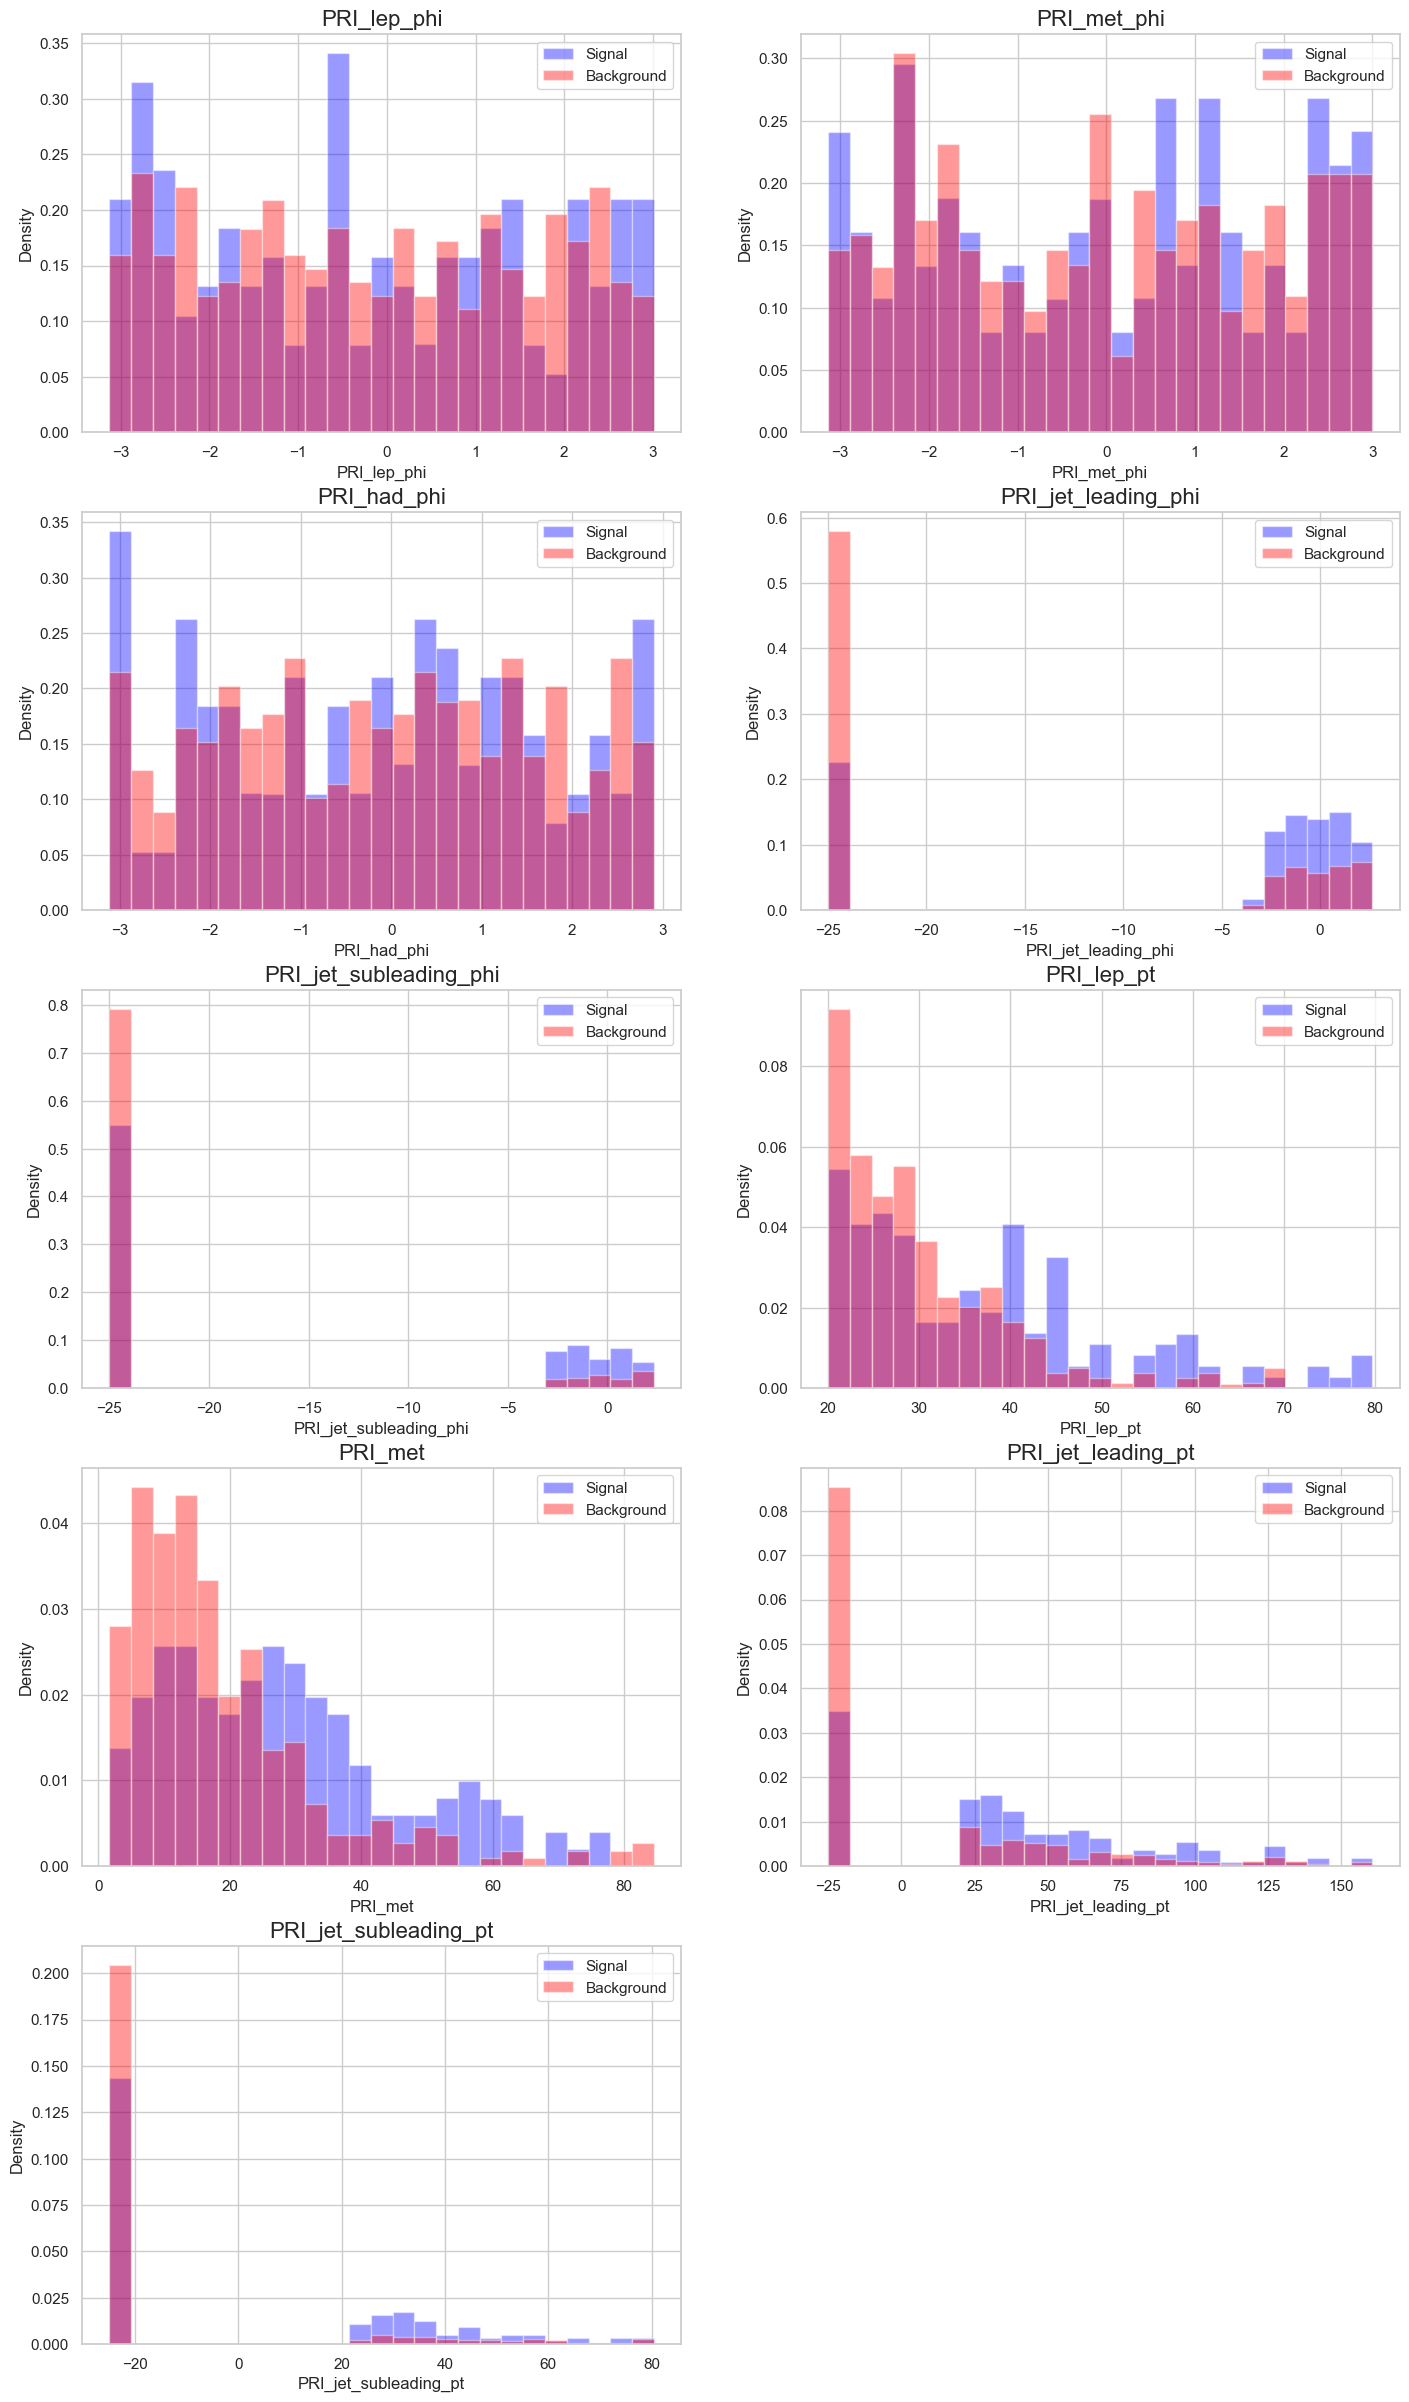

In [9]:
# Show data summary

train_visualize.histogram_dataset()

Signal feature  correlation matrix


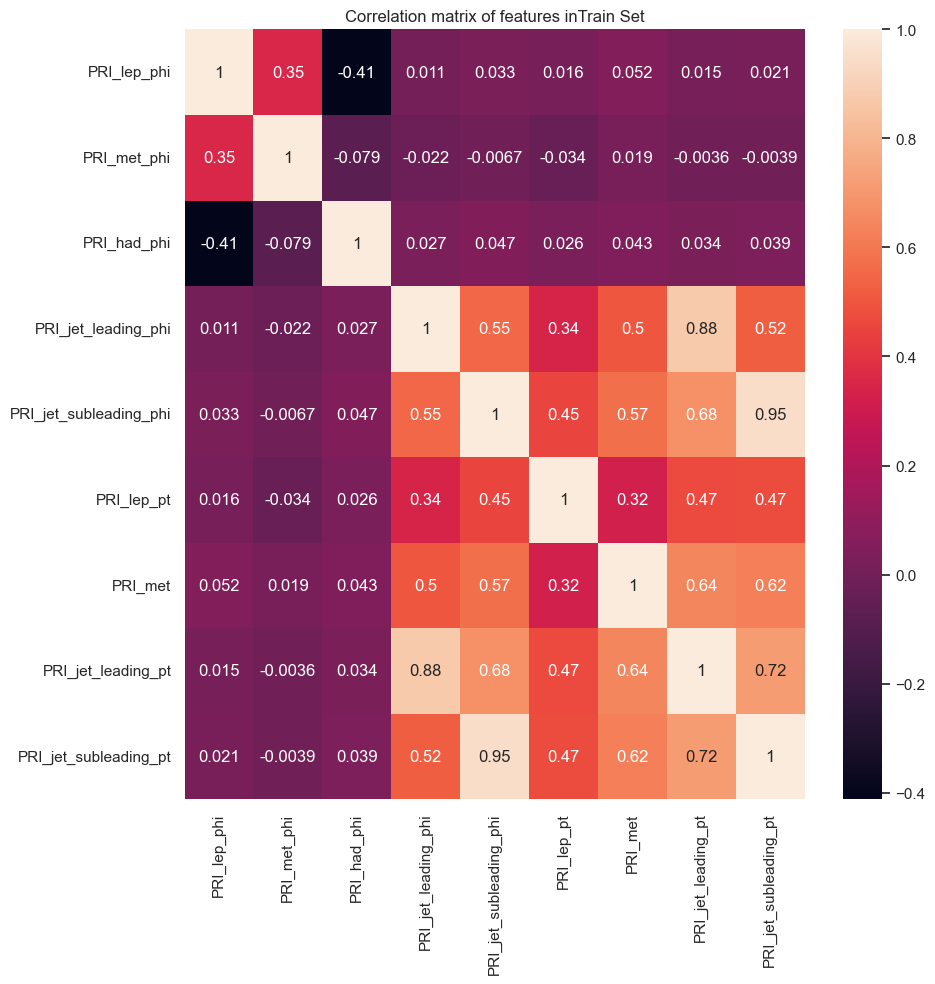

Background feature  correlation matrix


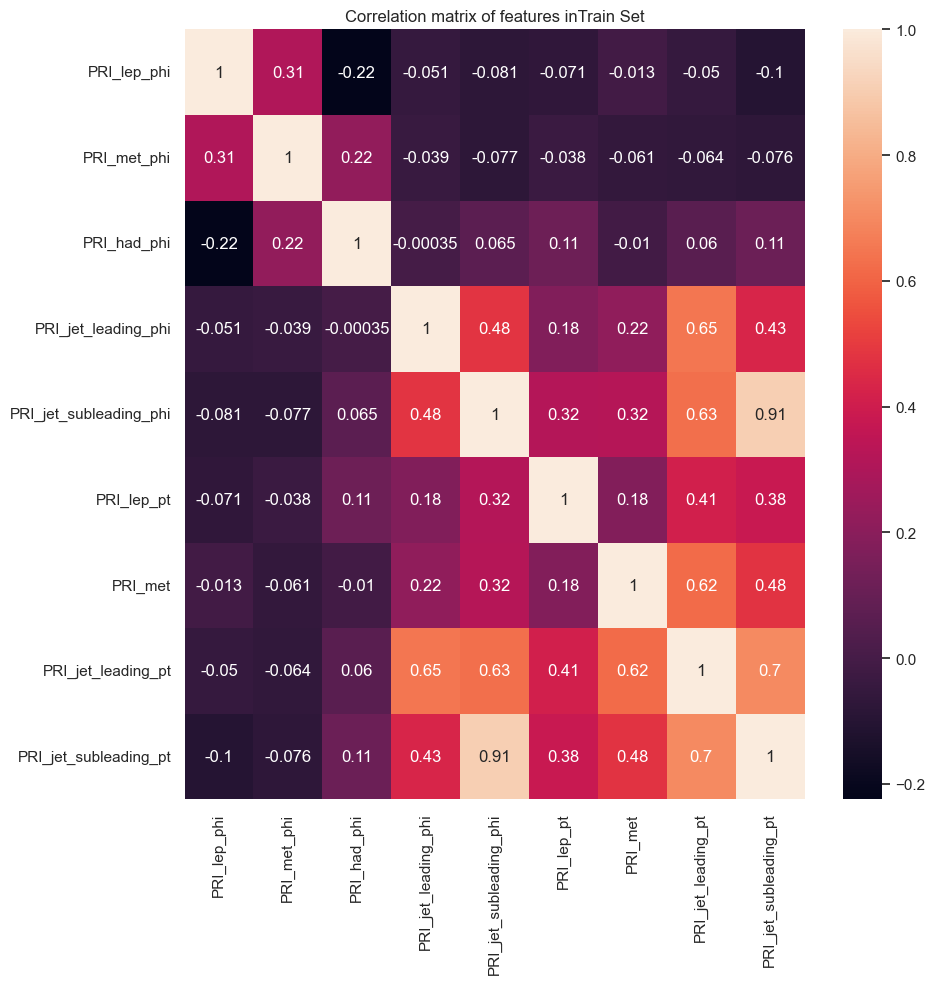

In [ ]:
train_visualize.correlation_plots()

In [ ]:
train_visualize.stacked_histogram("PRI_jet_subleading_pt")

2025-05-16 12:39:13,026 - HiggsML.visualization - ERROR    - Field PRI_had_eta not found in dataset.


ValueError: Field PRI_had_eta not found in dataset.

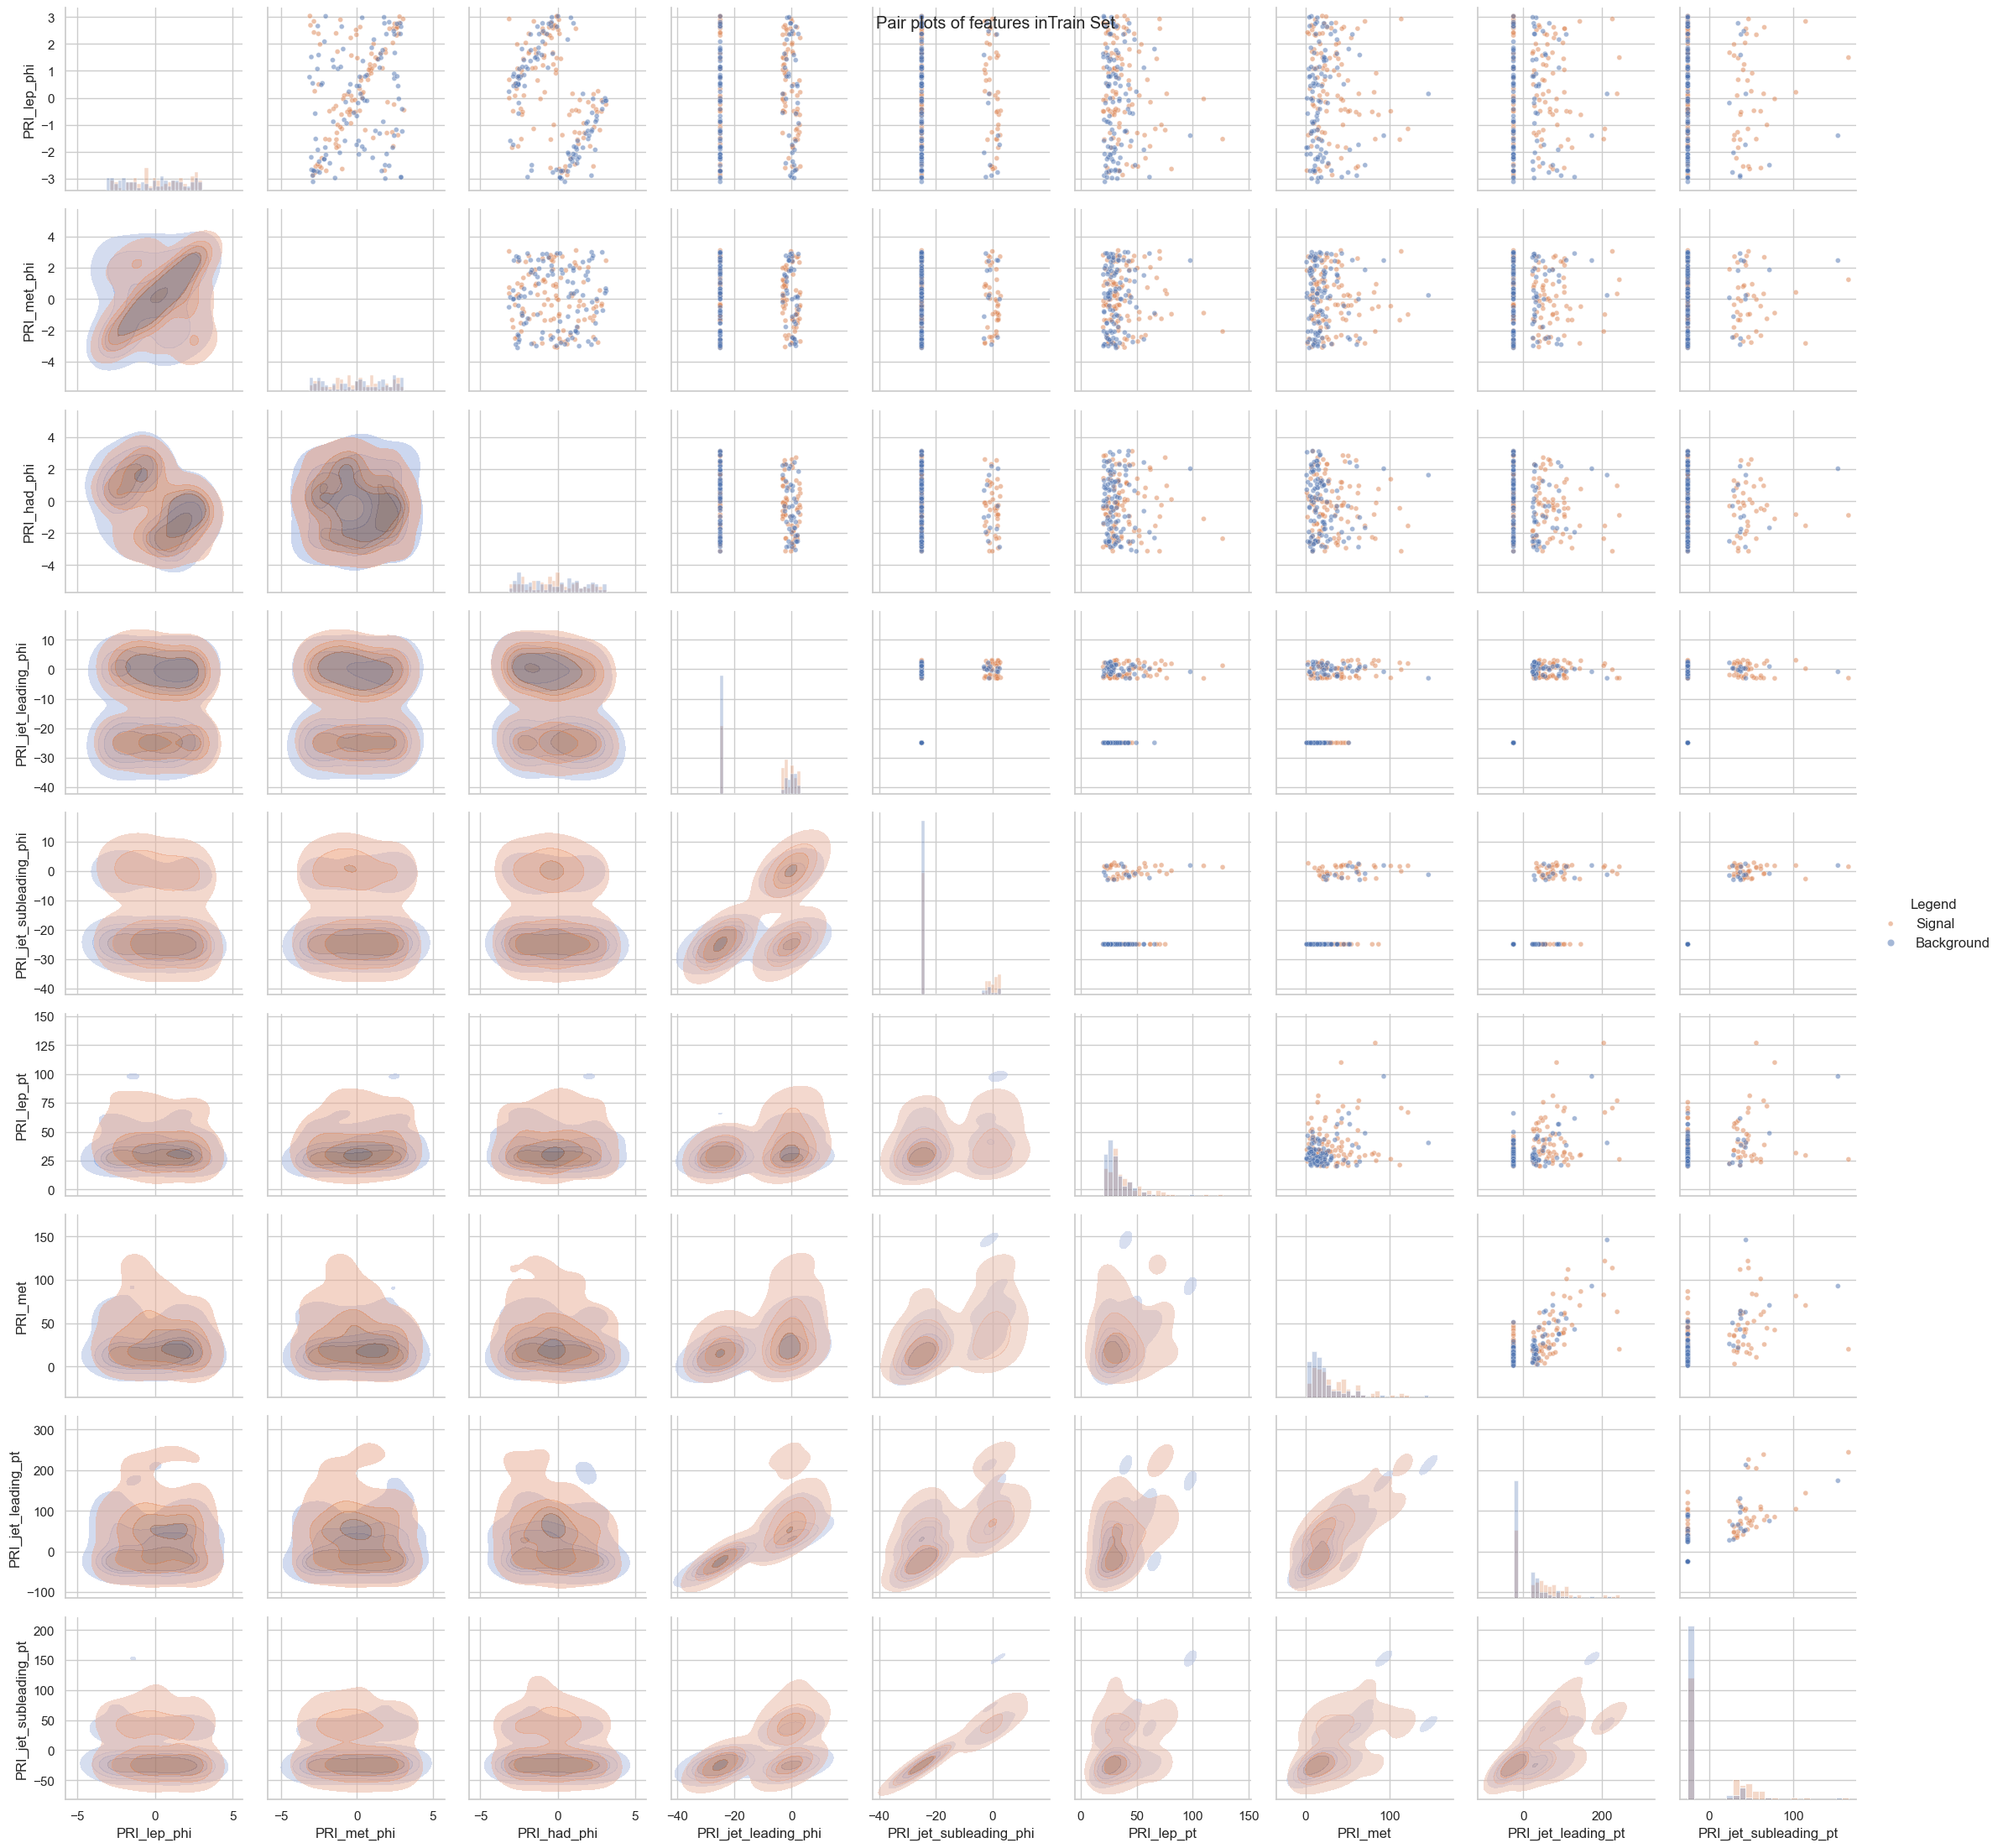

In [ ]:
# Show data summary
train_visualize.pair_plots(sample_size=100)

### Test Settings
The Test setting sets the test conditions in ingestion.
This includes what systematics you want and how many psuedo experiments you want. 

In [ ]:
TEST_SETTINGS = {
    "systematics": {  # Systematics to use
        "tes": False,  # tau energy scale
        "jes": False,  # jet energy scale
        "soft_met": False,  # soft term in MET
        "ttbar_scale": False,  # W boson scale factor
        "diboson_scale": False,  # Diboson scale factor
        "bkg_scale": False,  # Background scale factor
    },
    "num_pseudo_experiments": 10,  # Number of pseudo-experiments to run per set
    "num_of_sets": 2,  # Number of sets of pseudo-experiments to run
}

USE_RANDOM_MUS = True
RANDOM_SEED = 42

In [ ]:
test_settings = TEST_SETTINGS.copy()

if USE_RANDOM_MUS:
    random_state = np.random.RandomState(RANDOM_SEED)
    test_settings["ground_truth_mus"] = (
        random_state.uniform(0.1, 3, test_settings["num_of_sets"])
    ).tolist()
    test_settings["random_mu"] = True
    random_settings_file = os.path.join(output_dir, "test_settings.json")
    with open(random_settings_file, "w") as f:
        json.dump(test_settings, f)
else:
    test_settings["ground_truth_mus"] = data.ground_truth_mus


### Ingestion



In [ ]:

from HiggsML.ingestion import Ingestion

ingestion = Ingestion(data)


In [ ]:

# initialize submission
ingestion.init_submission(Model)

2025-04-02 16:29:45,367 - HiggsML.ingestion    - INFO     - Initializing Submmited Model
2025-04-02 16:29:58,777 - HiggsML.datasets     - INFO     - Sampled train data shape: (50000, 16)
2025-04-02 16:29:58,779 - HiggsML.datasets     - INFO     - Sampled train labels shape: (50000,)
2025-04-02 16:29:58,780 - HiggsML.datasets     - INFO     - Sampled train weights shape: (50000,)
2025-04-02 16:29:58,780 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (50000,)
2025-04-02 16:29:58,787 - HiggsML.datasets     - INFO     - Train data loaded successfully
2025-04-02 16:30:14,196 - HiggsML.datasets     - INFO     - Sampled train data shape: (50000, 16)
2025-04-02 16:30:14,198 - HiggsML.datasets     - INFO     - Sampled train labels shape: (50000,)
2025-04-02 16:30:14,199 - HiggsML.datasets     - INFO     - Sampled train weights shape: (50000,)
2025-04-02 16:30:14,200 - HiggsML.datasets     - INFO     - Sampled train detailed labels shape: (50000,)
2025-04-02 16:30:14,20

Training Data:  (50000, 16)
Training Labels:  (50000,)
Training Weights:  (50000,)
sum_signal_weights:  1019.8560347749982
sum_bkg_weights:  1048068.7624762985

Valid Data:  (50000, 16)
Valid Labels:  (50000,)
Valid Weights:  (50000,)
sum_signal_weights:  1011.7735669942828
sum_bkg_weights:  1052193.4873622863

Holdout Data:  (50000, 16)
Holdout Labels:  (50000,)
Holdout Weights:  (50000,)
sum_signal_weights:  1005.358274588177
sum_bkg_weights:  1055468.0295665788
 
 
Training Data:  (50000, 17)
Model is BDT


2025-04-02 16:30:27,540 - HiggsML.ingestion    - INFO     - Calling fit method of submitted model


score shape before threshold (50000,)
score shape after threshold (50000,)
saved_info {'beta': 203740.34349977027, 'gamma': 717.7114591145053}
Train Results: 
	 mu_hat  :  -100.77060467474386
	 del_mu_stat  :  0.6300169475102058
	 del_mu_sys  :  10.077060467474388
	 del_mu_tot  :  10.096735562511538
Holdout Results: 
	 mu_hat  :  1.0000000000000433
	 del_mu_stat  :  0.6300169475102058
	 del_mu_sys  :  0.10000000000000434
	 del_mu_tot  :  0.637903875321414
Valid Results: 
	 mu_hat  :  -1.7850419458119093
	 del_mu_stat  :  0.6300169475102058
	 del_mu_sys  :  0.17850419458119093
	 del_mu_tot  :  0.6548168458684894
[*] --- Dataset name : Train Set
[*] --- Number of events : 50000
[*] --- Number of features : 18
   diboson   3792.967268076941
   htautau   1011.7735669942828
   ttbar   43339.67401554843
   ztautau   1005060.8460786609
[*] --- Number of signal events : 16494
[*] --- Number of background events : 33506
[*] --- Examples of all features


PRI_lep_pt  PRI_lep_eta  PRI_lep_phi  PRI_had_pt  PRI_had_eta  PRI_had_phi  \
0   25.115999       -0.228        2.889   29.495001       -0.430       -0.399   
1   41.869999       -0.568       -1.377   27.341999       -1.711        1.580   
2   26.243000        0.275       -2.110   41.277000       -0.884        0.707   
3   21.997000       -1.149        0.581   35.450001       -1.649       -2.746   
4   26.632000        1.269        1.896   48.944000        1.707       -1.196   

   PRI_jet_leading_pt  PRI_jet_leading_eta  PRI_jet_leading_phi  \
0             -25.000              -25.000              -25.000   
1             -25.000              -25.000              -25.000   
2              31.535                2.589               -3.034   
3             -25.000              -25.000              -25.000   
4             -25.000              -25.000              -25.000   

   PRI_jet_subleading_pt  PRI_jet_subleading_eta  PRI_jet_subleading_phi  \
0                  -25.0                   -25.0                   -25.0   
1                  -25.0                   -25.0                   -25.0   
2                  -25.0                   -25.0                   -25.0   
3                  -25.0                   -25.0                   -25.0   
4                  -25.0                   -25.0                   -25.0   

   PRI_n_jets  PRI_jet_all_pt  PRI_met  PRI_met_phi  derived_feature     score  
0         0.0           0.000    8.238       -2.773        54.611000  0.110985  
1         0.0           0.000   10.973        2.137        69.211998  0.357613  
2         1.0          31.535    4.603        2.615        67.520004  0.458520  
3         0.0           0.000    2.842        0.624        57.446999  0.140698  
4         0.0           0.000    7.859       -2.672        75.576004  0.218278

[*] --- Description of all features


PRI_lep_pt   PRI_lep_eta   PRI_lep_phi    PRI_had_pt   PRI_had_eta  \
count  50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      34.024986     -0.000600      0.013258     43.069866      0.000552   
std       18.250368      1.221657      1.813497     21.068630      1.248771   
min       20.000999     -2.500000     -3.141000     22.997000     -2.629000   
25%       23.934000     -0.948000     -1.556000     30.737000     -0.981000   
50%       28.982000     -0.005000      0.019500     38.166000      0.006000   
75%       37.125999      0.947000      1.589250     48.211249      0.976000   
max      407.841003      2.500000      3.142000    641.158997      2.654000   

        PRI_had_phi  PRI_jet_leading_pt  PRI_jet_leading_eta  \
count  50000.000000        50000.000000         50000.000000   
mean      -0.006357           20.243565           -13.196897   
std        1.808102           62.922802            12.546584   
min       -3.142000          -25.000000           -25.000000   
25%       -1.568000          -25.000000           -25.000000   
50%       -0.022000          -25.000000           -25.000000   
75%        1.546250           47.151751            -0.177000   
max        3.141000          935.098999             4.903000   

       PRI_jet_leading_phi  PRI_jet_subleading_pt  PRI_jet_subleading_eta  \
count         50000.000000           50000.000000            50000.000000   
mean            -13.190198              -8.562950              -19.454041   
std              12.544345              34.349682               10.443573   
min             -25.000000             -25.000000              -25.000000   
25%             -25.000000             -25.000000              -25.000000   
50%             -25.000000             -25.000000              -25.000000   
75%              -0.171000             -25.000000              -25.000000   
max               3.141000             768.370972                4.837000   

       PRI_jet_subleading_phi    PRI_n_jets  PRI_jet_all_pt       PRI_met  \
count            50000.000000  50000.000000    50000.000000  50000.000000   
mean               -19.458042      0.844120       50.076015     24.728600   
std                 10.419625      1.162312       89.662437     27.644918   
min                -25.000000      0.000000        0.000000      0.005000   
25%                -25.000000      0.000000        0.000000      9.649750   
50%                -25.000000      0.000000        0.000000     16.748500   
75%                -25.000000      1.000000       63.779750     28.644749   
max                  3.140000      9.000000     2054.429932    531.411987   

        PRI_met_phi  derived_feature         score  
count  50000.000000     50000.000000  50000.000000  
mean       0.000150        77.094856      0.415637  
std        1.813928        30.524702      0.299737  
min       -3.141000        43.237000      0.001910  
25%       -1.578000        59.732752      0.152475  
50%        0.012000        69.498501      0.318387  
75%        1.571000        84.018755      0.692990  
max        3.141000       816.989014      0.999545

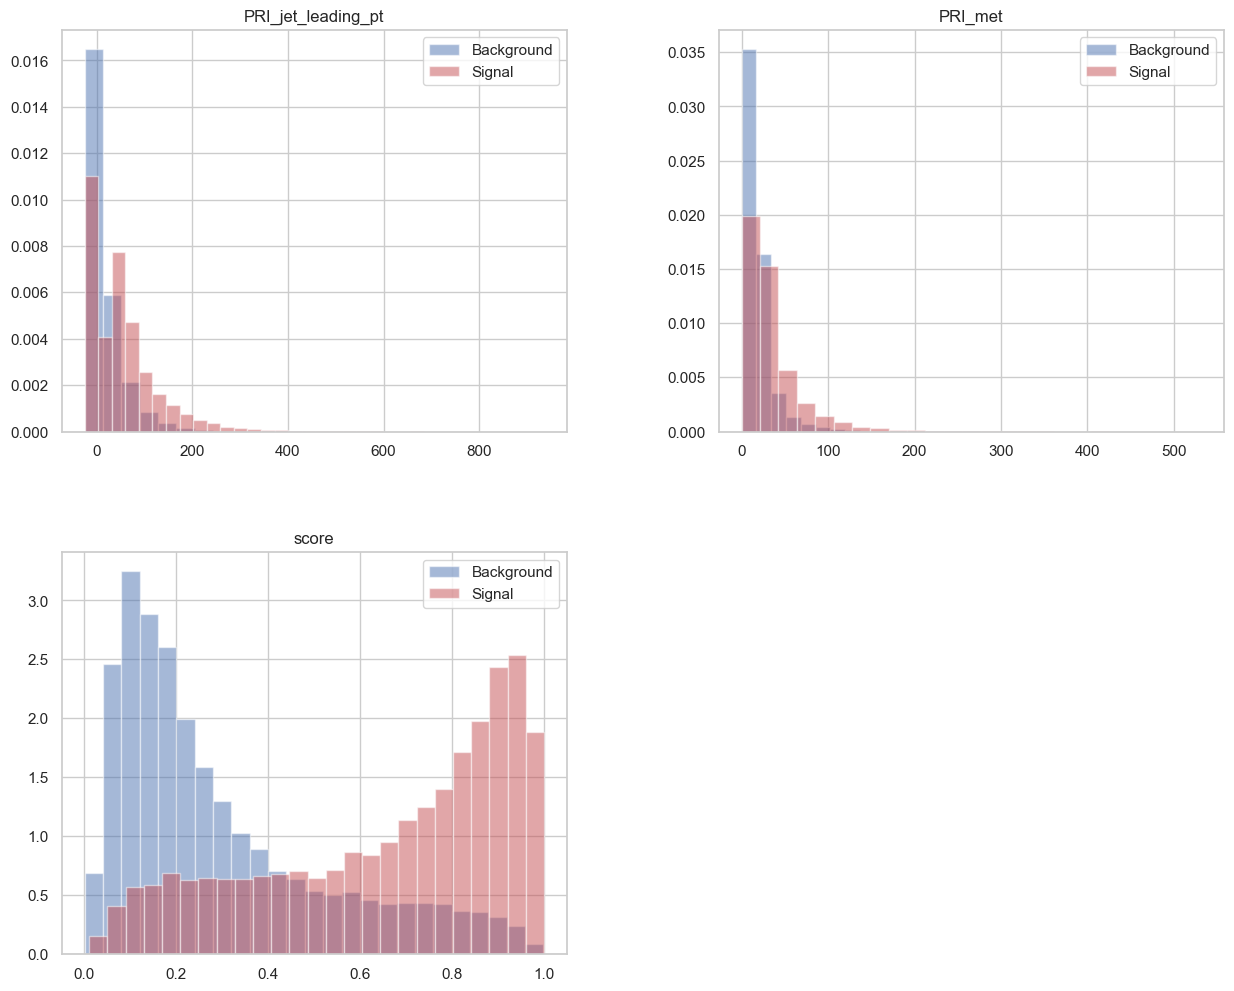

diboson (121,)
diboson (121,)
htautau (30,)
ttbar (1380,)
ttbar (1380,)
ztautau (32005,)
ztautau (32005,)


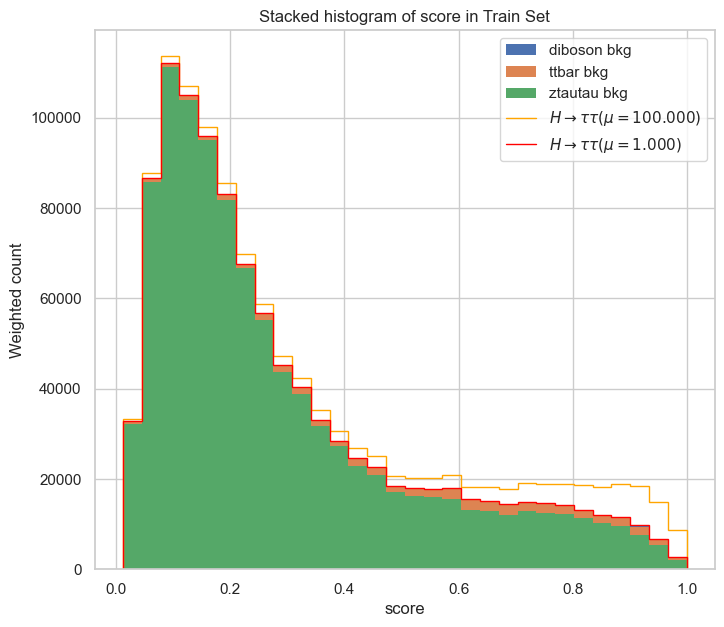

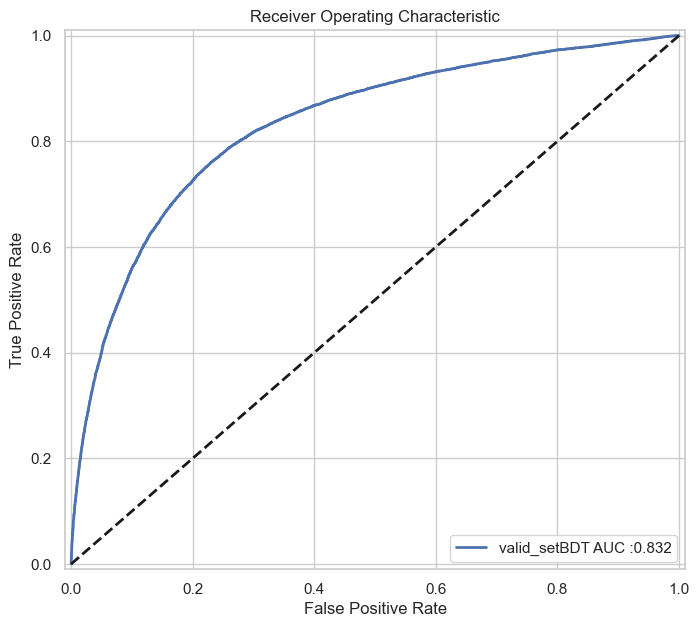

In [ ]:

# fit submission
ingestion.fit_submission()

In [ ]:

# load test set
data.load_test_set()

2025-04-02 16:30:44,549 - HiggsML.datasets     - INFO     - Test data loaded successfully


In [ ]:

# predict submission
ingestion.predict_submission(test_settings)

2025-04-02 16:30:44,569 - HiggsML.ingestion    - INFO     - Calling predict method of submitted model with seed: 31415


Test Results:  {'mu_hat': -17.496367572649895, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.7496367572649896, 'del_mu_tot': 1.8596102109105623}
Test Results:  {'mu_hat': -18.893865114680892, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.8893865114680892, 'del_mu_tot': 1.9916582899352069}
Test Results:  {'mu_hat': -20.117197958053985, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 2.0117197958053987, 'del_mu_tot': 2.108064963653965}
Test Results:  {'mu_hat': -19.60306376761586, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.9603063767615863, 'del_mu_tot': 2.059058630763635}
Test Results:  {'mu_hat': -17.40580192934779, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.7405801929347788, 'del_mu_tot': 1.8510917757331615}
Test Results:  {'mu_hat': -18.317031632725925, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.8317031632725926, 'del_mu_tot': 1.9370229302961024}
Test Results:  {'mu_hat': -17.699791940682324, 'del_mu_stat': 0.6300169475102058, 'del_mu_sys': 1.769979

In [ ]:
ingestion.process_results_dict()

In [ ]:

# save result
ingestion.save_result(output_dir)


## Score
1. Compute Scores
2. Visualize Scores


In [ ]:
from HiggsML.score import Scoring

In [ ]:
# Initialize Score
score = Scoring()

In [ ]:
print(output_dir)
score.load_ingestion_results(prediction_dir = output_dir, score_dir = output_dir)

2025-04-02 16:32:24,328 - HiggsML.score        - INFO     - Read ingestion results from /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission


/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission


2025-04-02 16:32:24,362 - HiggsML.score        - INFO     - Computing scores


[✔]


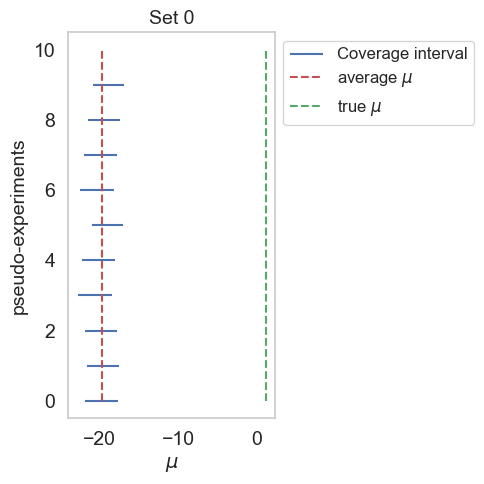

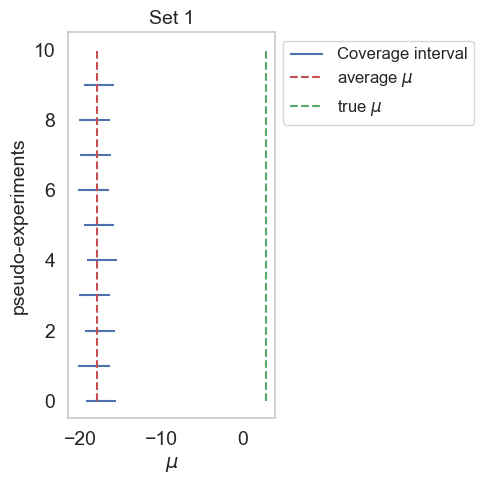

In [ ]:
# Compute Score
score.compute_scores(test_settings)


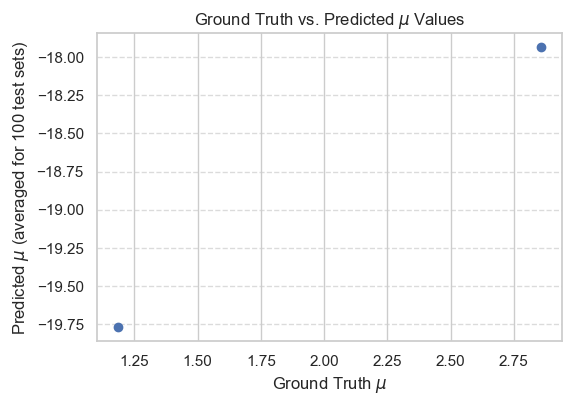

In [ ]:
# Visualize scatter plot of ground truth mu and predicted mu
visualization.visualize_scatter(ingestion_result_dict=ingestion.results_dict, 
                  ground_truth_mus=test_settings["ground_truth_mus"])

## Submissions

In [ ]:
from zipfile import ZipFile, ZIP_DEFLATED
from contextlib import closing
# -------------------------------------
# Zip files
# -------------------------------------
def zipdir(archivename, basedir):
    '''Zip directory, from J.F. Sebastian http://stackoverflow.com/'''
    assert os.path.isdir(basedir)
    with closing(ZipFile(archivename, "w", ZIP_DEFLATED)) as z:
        for root, dirs, files in os.walk(basedir):
            # NOTE: ignore empty directories
            for fn in files:
                if fn[-4:] != '.zip' and fn != '.DS_Store':
                    absfn = os.path.join(root, fn)
                    zfn = absfn[len(basedir):]  # XXX: relative path
                    z.write(absfn, zfn)

### **Prepare the submission**

In [ ]:
import datetime
the_date = datetime.datetime.now().strftime("%y-%m-%d-%H-%M")
code_submission = 'BlackSwan-code_submission_' + the_date + '.zip'
zipdir(code_submission, submission_dir)
print("Submit : " + code_submission + " to the competition")


Submit : BlackSwan-code_submission_25-04-02-16-32.zip to the competition


In [ ]:
!python3 -m HiggsML.score --prediction $output_dir --output $output_dir

############################################
### Scoring Program
############################################

/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission/test_settings.json
2025-04-02 16:32:27,928 - HiggsML.score        - INFO     - Reading ingestion duration from /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission/ingestion_duration.json
2025-04-02 16:32:27,928 - HiggsML.score        - WARNING  - File /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission/ingestion_duration.json not found. Setting ingestion duration to 0.
/home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission
2025-04-02 16:32:27,929 - HiggsML.score        - INFO     - Read ingestion results from /home/chakkappai/Work/ST4_CS/Collaboration_A/sample_result_submission
2025-04-02 16:32:27,929 - HiggsML.score        - INFO     - Computing scores
[✔]
2025-04-02 16:32:29,570 - HiggsML.score        - INFO     - Writing scores to /home/chakkappai/Work/ST